In [2]:
import tensorflow as tf

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.4.1


In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [7]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

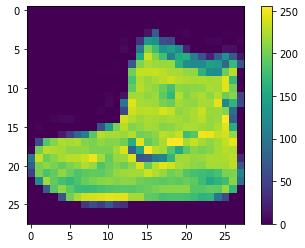

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

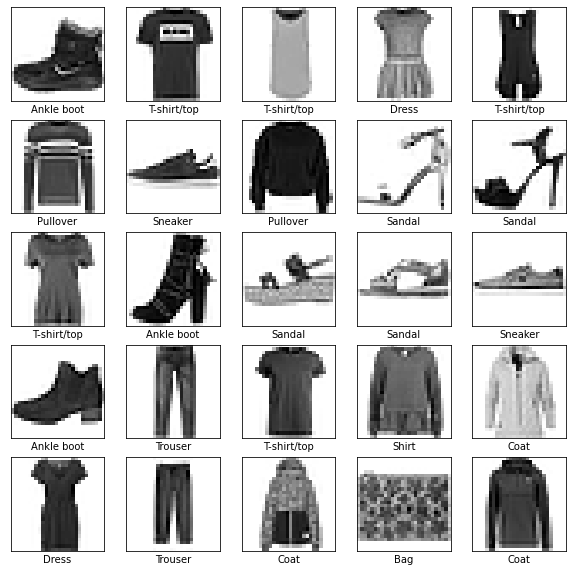

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6058 - accuracy: 0.7874
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3635 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3302 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2994 - accuracy: 0.8895
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2795 - accuracy: 0.8939
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2677 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9041
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9075
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2339 - accuracy: 0.9108
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.221

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3249 - accuracy: 0.8890

Test accuracy: 0.8889999985694885


In [24]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

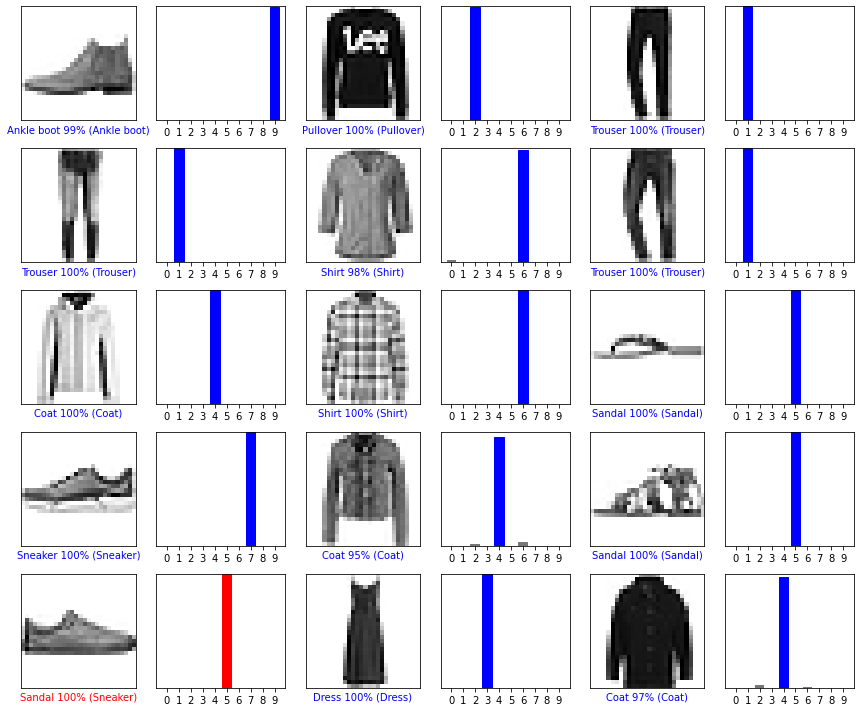

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()